In [1]:
%matplotlib notebook


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
city_df = pd.read_csv("city_data.csv")
ride_df = pd.read_csv("ride_data.csv")

pyber_data = pd.merge(ride_df, city_df, how="left", on = ["city", "city"])

pyber_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2018 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2018 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2018 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2018 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2018 6:26,42.81,5.327640e+12,33,Urban


<IPython.core.display.Javascript object>


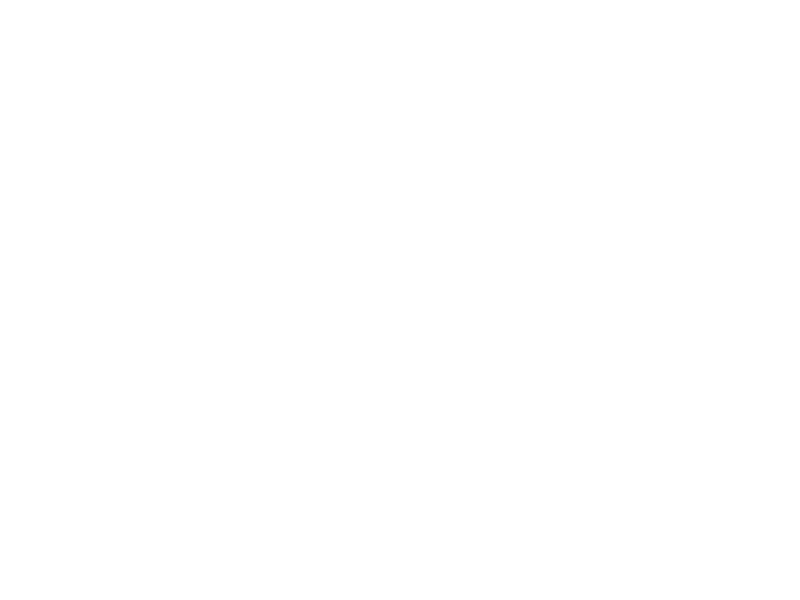

NameError: name 'driver_count' is not defined

In [5]:
fig, ax = plt.subplots()

ride_share_plot = ax.scatter(
    pyber_data[driver_count],
    pyber_data[fare]
)

ax.set_xlabel("Rides")
ax.set_ylabel("Fares")

plt.show()

In [9]:
# This code calculates the data to be used in the following three pie charts.
# The data is: "Total fares by city type (urban, suburban or rural)"
#           "Total rides by city type"
#            "Total drivers by city type"

city_data = pyber_data.groupby(["type"])

city_fares_total = city_data["fare"].sum()

city_rides_total = city_data["ride_id"].count()

city_drivers_total = (city_data["driver_count"]).sum()


<IPython.core.display.Javascript object>


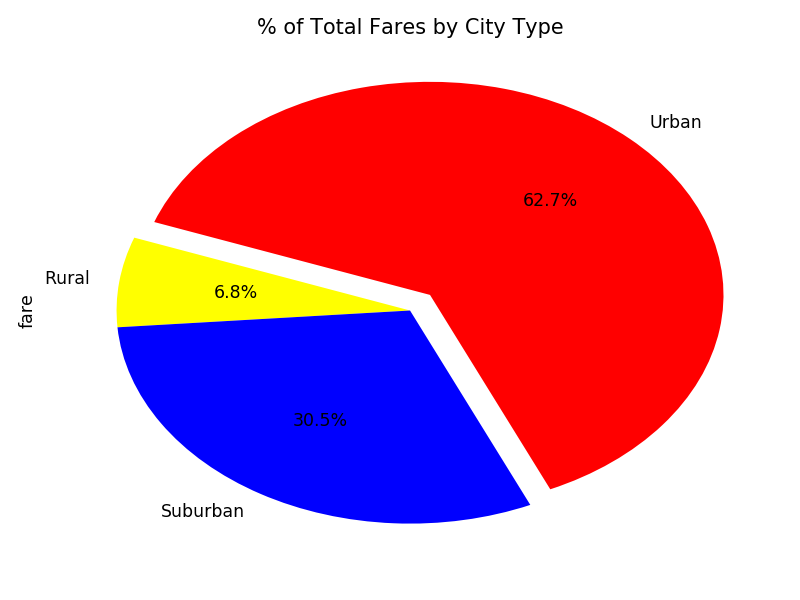

In [11]:
# This pie chart displays the total fares by city type

fares = city_fares_total
city_list = fares.keys()
colors = ["yellow", "blue", "red"]
explode = (0, 0, 0.1)
fares_pie = fares.plot(kind="pie", y=city_list, title=("% of Total Fares by City Type"), colors=colors, \
                       explode=explode,startangle=160, autopct="%1.1f%%")
plt.savefig("fares.png")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


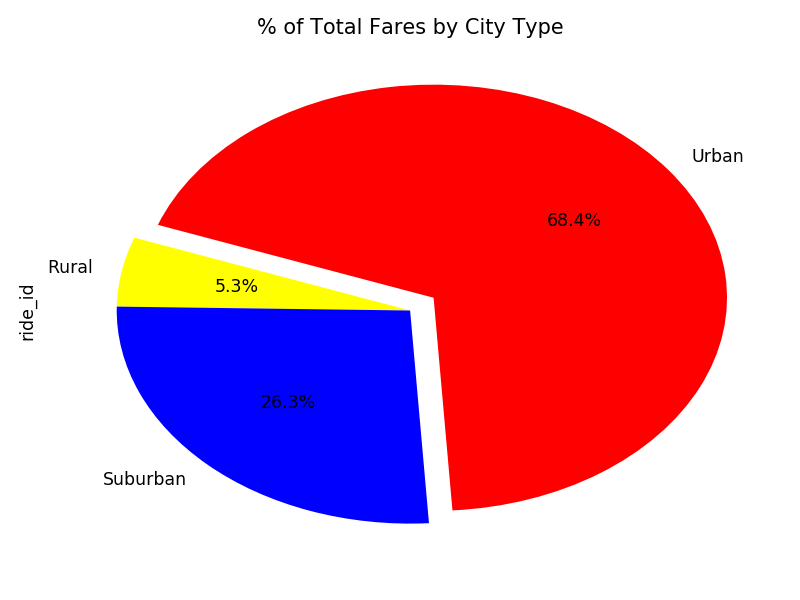

In [12]:
# This pie chart displays the total rides by city type

rides = city_rides_total
city_list = rides.keys()
colors = ["yellow", "blue", "red"]
explode = (0, 0, 0.1)
rides_pie = rides.plot(kind="pie", y=city_list, title=("% of Total Fares by City Type"), colors=colors, \
                       explode=explode,startangle=160, autopct="%1.1f%%")
plt.savefig("rides.png")

plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


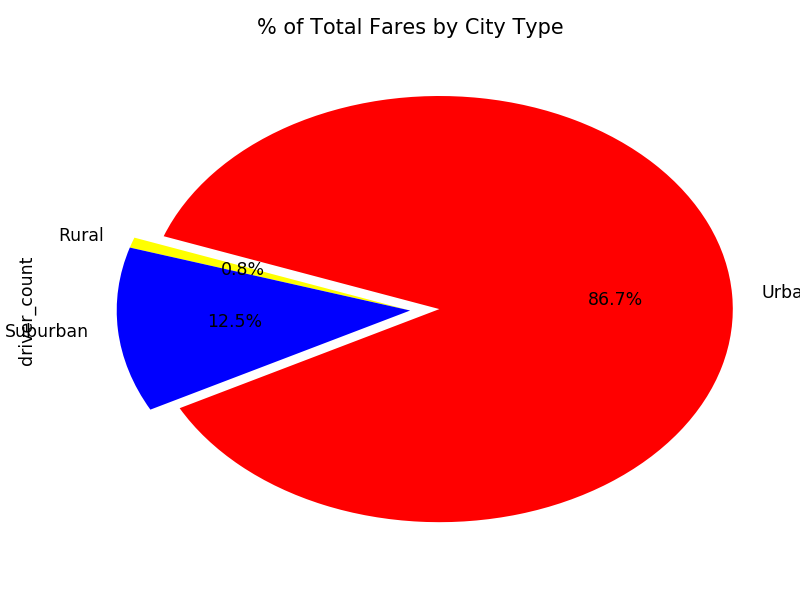

In [13]:
# This pie chart displays the total drivers by city type

drivers = city_drivers_total
city_list = drivers.keys()
colors = ["yellow", "blue", "red"]
explode = (0, 0, 0.1)
drivers_pie = drivers.plot(kind="pie", y=city_list, title=("% of Total Fares by City Type"), colors=colors, \
                       explode=explode,startangle=160, autopct="%1.1f%%")
plt.savefig("drivers.png")

plt.show()
plt.tight_layout()